## Exploracion basica de un archivo .mat

El siguiente notebook explora de manera sencilla un archivo de matlab donde se guarda la información de un sensor.

In [17]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [18]:
# prompt: necesito cargar un archivo mat que esta en esta misma carpeta usando pandas

import scipy.io
import pandas as pd

# Ruta al archivo .mat en Google Drive
mat_file_path = 'S1_A1_E1.mat'
mat_data = scipy.io.loadmat(mat_file_path)
keys_mat_data = list(mat_data.keys())
print(keys_mat_data)
column_names = keys_mat_data[3:]
print(column_names)

['__header__', '__version__', '__globals__', 'emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']
['emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']


Segun la IA el archivo .mat tiene:
* **`emg`**: Matriz con las señales EMG (10 columnas)
* **`glove`**: Matriz con datos del CyberGlove (22 columnas)
* **`stimulus`**: Vector con etiquetas de movimientos
* **`repetition`**: Vector con números de repetición
* **`rerepetition`**: Vector indicando repeticiones adicionales
* **`subject`**: Número de sujeto
* **`exercise`**: Número de ejercicio

In [3]:
# Creacion de un diccionario a partir del archivo .mat
data_dict = {}

for col_name in column_names:
  if col_name in mat_data:
    data_dict[col_name] = mat_data[col_name].flatten()  # Flatten the data if necessary

# data_dict

markdown_text = """| Columna | Longitud |
|---|---|"""

for key, value in data_dict.items():
  markdown_text += f"\n| {key} | {len(value)} |"

display(Markdown(markdown_text))

| Columna | Longitud |
|---|---|
| emg | 1010140 |
| stimulus | 101014 |
| glove | 2222308 |
| subject | 1 |
| exercise | 1 |
| repetition | 101014 |
| restimulus | 101014 |
| rerepetition | 101014 |

In [4]:
# prompt: crear un dataframe a partir de las columnas de un archivo .mat

### Posturas

Para el ejercicio 1 (**`E1`**) estas son las posturas empleadas.

In [5]:
stimulus_data = pd.DataFrame(mat_data['stimulus'])
stimulus_data.columns = ['stimulus']
stimulus_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101014 entries, 0 to 101013
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   stimulus  101014 non-null  uint8
dtypes: uint8(1)
memory usage: 98.8 KB


In [6]:
# Example: Count the number of repeated values in the 'stimulus' column

conteo_ejercicios = stimulus_data['stimulus'].value_counts()
conteo_ejercicios

0     39063
2      5174
4      5173
5      5173
12     5173
8      5172
7      5171
6      5170
11     5166
3      5158
1      5149
10     5137
9      5135
Name: stimulus, dtype: int64

### Repeticion

Que es la repeticion en este contexto.

In [7]:
repeticion_estimulo_data = pd.DataFrame(mat_data['repetition'])
repeticion_estimulo_data.columns = ['repetition']
repeticion_estimulo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101014 entries, 0 to 101013
Data columns (total 1 columns):
 #   Column      Non-Null Count   Dtype
---  ------      --------------   -----
 0   repetition  101014 non-null  uint8
dtypes: uint8(1)
memory usage: 98.8 KB


In [8]:
conteo_repeticion_estimulo_data = repeticion_estimulo_data['repetition'].value_counts()
conteo_repeticion_estimulo_data

0     39063
5      6206
4      6199
3      6198
10     6198
2      6194
9      6194
1      6192
6      6191
8      6190
7      6189
Name: repetition, dtype: int64

## Mediciones

### Mediciones EMG

Tomadas de los 10 electrodos

In [9]:
emg_data = pd.DataFrame(mat_data['emg'])
new_column_names = ['EMG_' + str(i) for i in range(1, emg_data.shape[1] + 1)]
emg_data.columns = new_column_names
emg_data.head()

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146


In [10]:
emg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101014 entries, 0 to 101013
Data columns (total 10 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EMG_1   101014 non-null  float64
 1   EMG_2   101014 non-null  float64
 2   EMG_3   101014 non-null  float64
 3   EMG_4   101014 non-null  float64
 4   EMG_5   101014 non-null  float64
 5   EMG_6   101014 non-null  float64
 6   EMG_7   101014 non-null  float64
 7   EMG_8   101014 non-null  float64
 8   EMG_9   101014 non-null  float64
 9   EMG_10  101014 non-null  float64
dtypes: float64(10)
memory usage: 7.7 MB


### Mediciones del guante


In [11]:
glove_data = pd.DataFrame(mat_data['glove'])
new_column_names = ['G_' + str(i) for i in range(1, glove_data.shape[1] + 1)]
glove_data.columns = new_column_names
glove_data.head()

,G_1,G_2,G_3,G_4,G_5,G_6,G_7,G_8,G_9,G_10,...,G_13,G_14,G_15,G_16,G_17,G_18,G_19,G_20,G_21,G_22
0,146.0,121.0,113.0,128.0,117.0,95.0,65.0,97.0,108.0,75.0,...,88.0,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0
1,146.0,121.0,113.0,128.0,117.0,95.0,65.0,97.0,108.0,75.0,...,88.0,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0
2,146.0,121.0,113.0,128.0,117.0,95.0,65.0,97.0,108.0,75.0,...,88.0,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0
3,146.0,121.0,113.0,128.0,117.0,95.0,65.0,97.0,108.0,75.0,...,88.0,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0
4,146.0,121.0,113.0,128.0,117.0,95.0,65.0,97.0,108.0,75.0,...,88.0,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0


### Dataframe preliminar

A continuación se muestra el dataframe preliminar el cual concatena solamente:
* La postura
* Los datos de los electrodos.
* Los datos del guante.

In [12]:
data_preliminar = pd.concat([emg_data, glove_data, stimulus_data], axis=1)
data_preliminar.head()

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,...,G_14,G_15,G_16,G_17,G_18,G_19,G_20,G_21,G_22,stimulus
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0


## Graficas

In [40]:
def indice_numero(df, num):
  return (df.index[df == num][0],df.index[df == num][-1])

# print(indice_numero(stimulus_data['stimulus'], 1))

In [39]:
def detectar_cambios_nivel(data, valor):
    cambios = []
    for i in range(1, len(data)):
        if data[i] == valor and data[i-1] != valor:
            cambios.append((i-1,0))
            cambios.append((i,valor))
        elif data[i] != valor and data[i-1] == valor:
            cambios.append((i-1,valor))
            cambios.append((i,0))
    cambios.pop(0)
    cambios.pop()
    return cambios

# detectar_cambios_nivel(stimulus_data['stimulus'], 1)

In [15]:
def graficar_serie(df_medida, df_num_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_num_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    if num_puntos:
        df_medida = df_medida.iloc[inicio:inicio + num_puntos]
    fig, ax = plt.subplots(figsize=(20, 5))

    cambios_nivel = detectar_cambios_nivel(df_num_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:    
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')
         
    plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

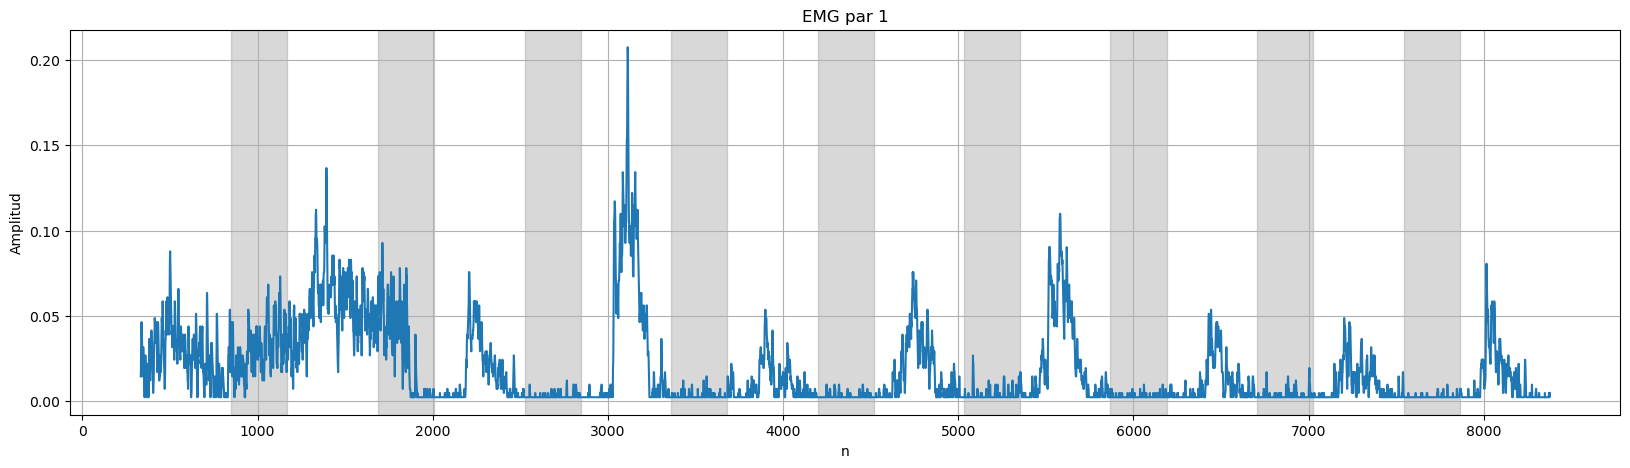

In [20]:
graficar_serie(emg_data['EMG_1'], stimulus_data['stimulus'], 1, titulo="EMG par 1", etiqueta_x="n", etiqueta_y="Amplitud")

In [45]:
def graficar_series(df_medida, columnas_medida, df_num_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_num_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    fig, ax = plt.subplots(figsize=(20, 5))
    if num_puntos:        
        for columna in columnas_medida:
           df_col = df_medida[columna].iloc[inicio:inicio + num_puntos]
           plt.plot(df_col.index, df_col, label=columna)  # Graficar cada columna
        
    

    cambios_nivel = detectar_cambios_nivel(df_num_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:    
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')
         
    #plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

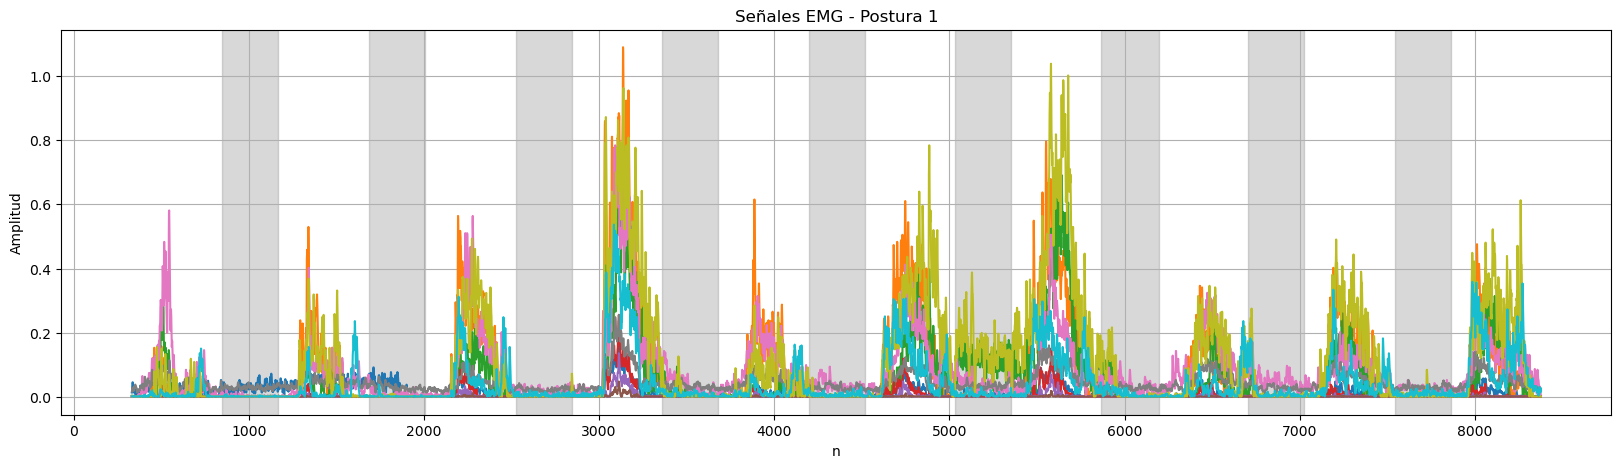

In [48]:
graficar_series(df_medida= emg_data, 
                columnas_medida = emg_data.columns, 
                df_num_label = stimulus_data['stimulus'],
                num = 1,
                titulo="Señales EMG - Postura 1", 
                etiqueta_x="n", 
                etiqueta_y="Amplitud")


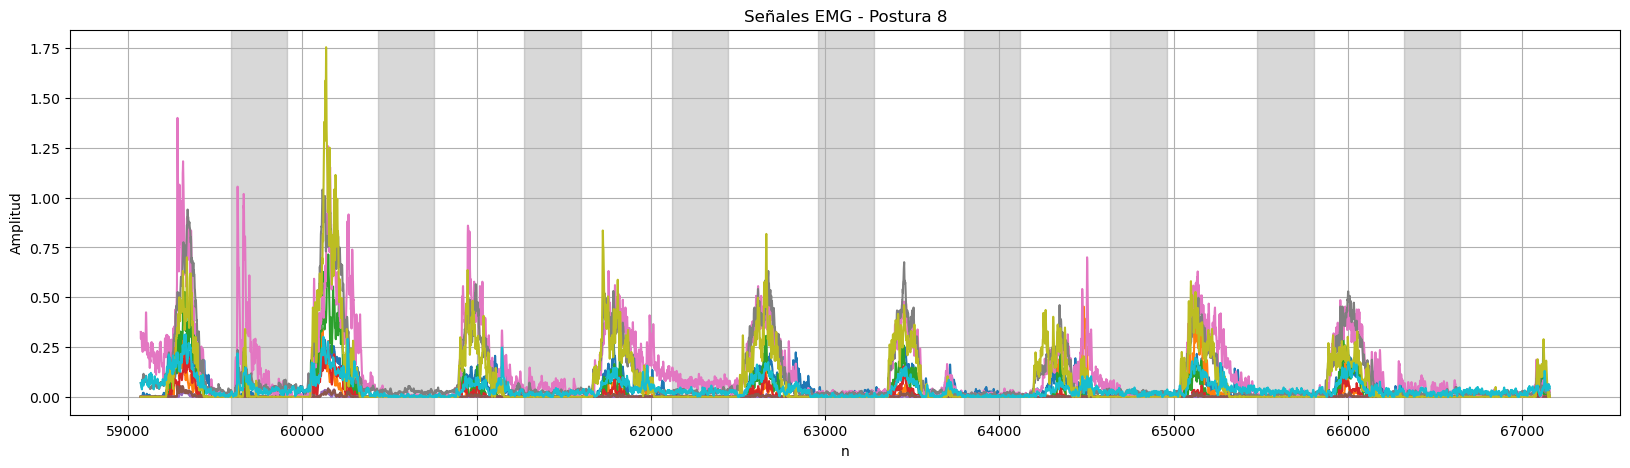

In [47]:
graficar_series(df_medida= emg_data, 
                columnas_medida = emg_data.columns, 
                df_num_label = stimulus_data['stimulus'],
                num = 8,
                titulo="Señales EMG - Postura 8", 
                etiqueta_x="n", 
                etiqueta_y="Amplitud")

### Preguntas

1. ¿Cual columna deberia ser el label?
2. ¿Es necesario tener ademas de las columnas de los sensores las otras (tal vez por correlacion por ejemplo)?
3. ¿Como se deberia construir el vector de entradas y el de labels?, ¿de toda la información como seria el caso?
